# Анализ интернет-магазина

Импортируем рабочие библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats as stats


## Часть 1. Приоритизация гипотез.


Прочитаем файл с гипотезами

In [2]:
df = pd.read_csv('//datasets/hypothesis.csv')

In [3]:
df.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


Файл hypothesis.csv
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Посчитаем ICE для гипотез. Добавим значения ICE к существующей таблице. Выведим столбцы 'hypothesis' и 'ICE', отсортируем по столбцу 'ICE'

In [4]:
df['ICE'] = (df['Impact'] * df['Confidence'])/df['Efforts']

In [5]:
df[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Наиболее перспективными показывают себя 8, 0 и 7 гипотезы

Посчитаем RICE для гипотез. Добавим полученные значения RICE к существующей таблице. 
Выведим из получившейся таблицы столбцы 'hypothesis' и 'RICE', отсортированные по столбцу 'RICE'.

In [6]:
df['RICE'] = (df['Reach'] * df['Impact'] * df['Confidence'])/df['Efforts']

In [7]:
df[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


На этот раз наиболее перспективные гипотезы: 7, 2, 0, 6

На первом уже гипотеза под номером 7, так получилось, потому что её параметр Reach равен = 10, в то время как у других гипотез он меньше.

Кроме силы гипотез, нужно учитывать и то, как много пользователей она затронет.



## Часть 2. Анализ A/B-теста

Изучим файл *df_orders*

In [8]:
df_orders = pd.read_csv('/datasets/orders.csv')


In [9]:
df_orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [10]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Файл orders.csv
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Переведём дату в временной формат 

In [11]:
df_orders['date'] = df_orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Изучим файл *df_visitors*

In [12]:
df_visitors = pd.read_csv('/datasets/visitors.csv')

In [13]:
df_visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
df_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Файл visitors.csv
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [15]:
df_visitors['date'] = df_visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


Создадим массив уникальных пар значений дат и групп теста

In [16]:
datesGroups = df_orders[['date','group']].drop_duplicates()


Соберём агрегированные кумулятивные по дням данные о заказах

In [17]:
df_ordersAggregated = datesGroups.apply(lambda x: 
                                        df_orders[np.logical_and(df_orders['date'] <= x['date'], 
                                                              df_orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique,
      'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина

In [18]:
df_visitorsAggregated = datesGroups.apply(lambda x: 
                                       df_visitors[np.logical_and(df_visitors['date'] <= x['date'], 
                                                               df_visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим обе таблицы в одной с понятными названиями столбцов

In [19]:
cummulativeData = df_ordersAggregated.merge(df_visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [20]:
cummulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


Построим графики кумулятивной выручки по дням и группам A/B-тестирования

In [21]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cummulativeRevenueA = cummulativeData[cummulativeData['group'] == 'A'][['date', 'revenue', 'orders']]



In [22]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cummulativeRevenueB = cummulativeData[cummulativeData['group'] == 'B'][['date', 'revenue', 'orders']]


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


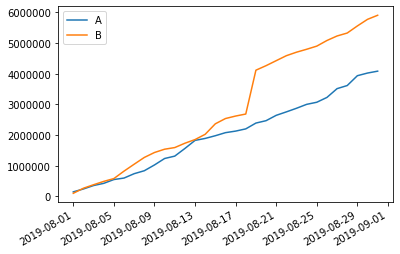

In [23]:
fig = plt.figure()
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label = 'A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label = 'B')
fig.autofmt_xdate()
plt.legend()


С самого начала выручка увеличивалась почти равномерно, но с 2019-08-17 группы В начала очень резко расти, на это могло повлиять, например, всплеск заказов или же появление дорогих заказов в выборке.



Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов

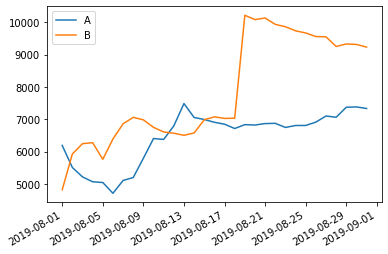

In [24]:
fig = plt.figure()
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label = 'A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label = 'B')
fig.autofmt_xdate()
plt.legend()



Как видим, результаты среднего чека такие же, с 2019-08-17 резкий скачёк группы В, возможно во второй половине теста попали крупные заказы.



Построим график относительного различия для среднего чека

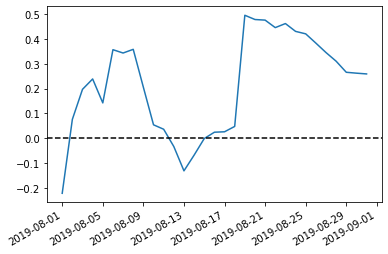

In [25]:
fig = plt.figure()
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])

plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)

plt.axhline(y = 0, color = 'black', linestyle = '--')
fig.autofmt_xdate()


В нескольких точках график различия между сегментами резко «скачет», значит в тесте есть крупные заказы и выбросы



Проанализируем график кумулятивной конверсии

In [26]:
# проанализируем график кумулятивной конверсии
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

Отделяем данные по группам

In [27]:
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

Посторим сам график

['2019-08-01', '2019-09-01', 0, 0.045]

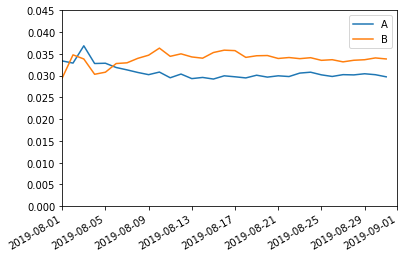

In [28]:
fig = plt.figure()
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.legend()
fig.autofmt_xdate()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0, 0.045])



Конверсия группы В почти сразу стала выше и зафиксировалась с небольшими колебаниями, а группа А просела и так же зафиксировалась


Построим график относительного различия кумулятивных конверсий

In [29]:
mergedCummulativeConversions = cummulativeDataA[['date', 'conversion']].merge(cummulativeDataB[['date', 'conversion']], left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])


<function matplotlib.pyplot.legend(*args, **kwargs)>

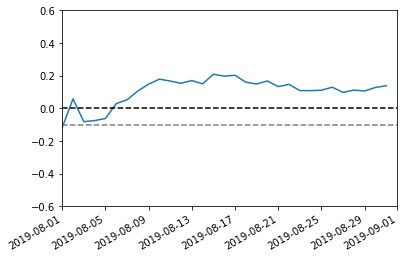

In [30]:
fig = plt.figure()
plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1, label = "Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.6, 0.6])
fig.autofmt_xdate()
plt.legend

В начале теста группа В и группа А были почти на одном и том же уровне, затем В вырвалась сильно вперёд и под конец теста незначительно просела, но остаётся тенденция роста


Изучим гистограмму распределения стоимостей заказов

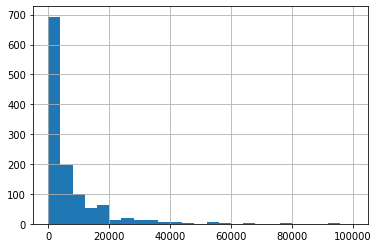

In [31]:
df_orders['revenue'].hist(bins = 25, range = (0, 100000))

В данных видим, что есть заказы дороже 40 000, например около 60 000, 80 000 и 90 000

Изучим данные при помощи *scatter*

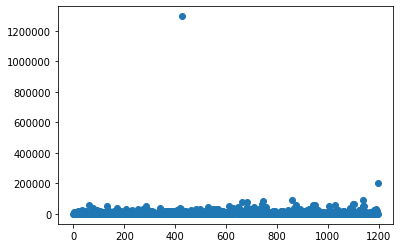

In [32]:
x_values = pd.Series(range(0,len(df_orders['revenue'])))
plt.scatter(x_values, df_orders['revenue'])


Кто-то очень солидно закупился, больше чем на 1 200 000, есть так же около 200 000

Определим 95 и 99 перцентили среднего чека в выборке

In [33]:
np.percentile(df_orders['revenue'], [95, 99])


array([28000. , 58233.2])

Подсчитаем количество заказов по пользователям и посмотрим на результат

In [34]:
ordersByUsers = df_orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})


In [35]:
ordersByUsers.columns = ['userId','orders']


In [36]:
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Есть пользователи, которые совершали 5, 8, 9, 11 заказов

Построим гистрограмму распределения количества заказов на одного пользователя

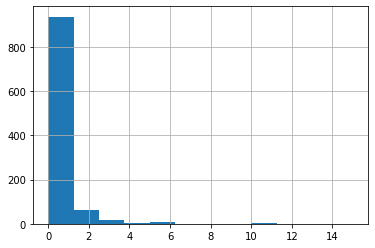

In [37]:
ordersByUsers['orders'].hist(bins = 12, range = (0, 15))

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна.

Построим точечную диаграмму числа заказов на одного пользователя

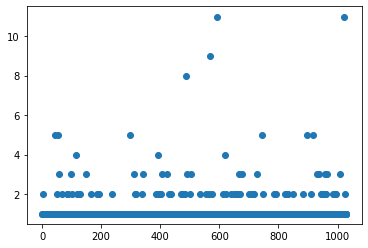

In [38]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

Выводы подтверждаются: много пользователей с 2-3 заказами.

Посчитаем выборочные перцентили количества заказов на одного пользователя

In [39]:
np.percentile(ordersByUsers['orders'], [95, 99])


array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более четырёх раз.

Выберим 3 заказа на одного пользователя за нижнюю границу числа заказов, и отсеим аномальных пользователей по ней. 



# Статистическая значимость различий

Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей

In [40]:
# датафрейм с посетителями по дням в группе А
visitorsADaily = df_visitors[df_visitors['group']=='A'][['date', 'visitors']]


In [41]:
#переименуем столбцы
visitorsADaily.columns = ['date', 'visitorsPerDateA']

Соберём кумулятивные по дням данные о количестве пользователей в группе A

In [42]:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 
                                                                                                               'visitorsPerDateA' : 'sum'}), axis=1)

In [43]:
#переименуем столбцы
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [44]:
# датафрейм с посетителями по дням в группе В
visitorsBDaily = df_visitors[df_visitors['group']=='B'][['date', 'visitors']]


In [45]:
#переименуем столбцы
visitorsBDaily.columns = ['date', 'visitorsPerDateB']


Соберём кумулятивные по дням данные о количестве пользователей в группе В

In [46]:
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 
                                                                                                               'visitorsPerDateB' : 'sum'}), axis=1)

In [47]:
#переименуем столбцы
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Соберем данные о количестве заказов, суммарной выручке по дням в группе А

In [48]:
ordersADaily = df_orders[df_orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})

In [49]:
#переименуем столбцы
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

Соберем данные о суммерном (коммулятивном) количестве заказов, суммарной выручке по дням в группе А

In [50]:
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])

In [51]:
#переименуем столбцы
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

Соберем данные о количестве заказов, суммарной выручке по дням в группе В

In [52]:
ordersBDaily = df_orders[df_orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})

In [53]:
#переименуем столбцы
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

Соберем данные о суммерном (коммулятивном) количестве заказов, суммарной выручке по дням в группе В

In [54]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])

In [55]:
#переименуем столбцы
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']


Объеденим полученные данные в один датафрейм

In [56]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [57]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами, в которых для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

In [58]:
ordersByUsersA = df_orders[df_orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

In [59]:
ordersByUsersB = df_orders[df_orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [60]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)




In [61]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой

In [62]:
ordersByUsersA = df_orders[df_orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

In [63]:
ordersByUsersB = df_orders[df_orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [64]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [65]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [66]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


Видим, что p-value = 0.008 меньше 0.05. Значит, нулевую гипотезу - отвергаем, можно сказать, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B равен 13.8%



Найдём относительные различия в среднем чеке между группами

In [67]:
print("{0:.3f}".format(stats.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], df_orders[df_orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1))



0.365
0.259


P-value больше 0.05 - статистически значимых различий в среднем чеке между группами нет, но различие среднего чека между сегментами 25.9%



Сделаем срезы пользователей с числом заказов больше 3 —  и пользователей, совершивших заказы дороже 35 000


In [68]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 3]['userId']], axis = 0)
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 35000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
23      237748145
684     358944393
648     382846391
dtype: int64
(42,)


Всего 42 аномальных пользователей.


Подготовим выборки количества заказов по пользователям по группам теста

In [69]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)


In [70]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

Применим статистический критерий Манна-Уитни к полученным выборкам

In [71]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.155


Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент В значительно лучше сегмента А.



Посмотрим на результаты по среднему чеку

In [72]:
print("{0:.3f}".format(stats.mannwhitneyu(
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    df_orders[np.logical_and(
        df_orders['group']=='B',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    df_orders[np.logical_and(df_orders['group']=='B',np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.437
0.025


P-value увеличился, разница между сегментами сократилась с 25.9% до 2.5%



Выводы по проведенному А/В тестированию:

* P-value больше 0.05 - статистически значимых различий в среднем чеке между группами нет, но различие среднего чека между сегментами 25.9%

* Р-value = 0.008 меньше 0.05. Значит, нулевую гипотезу - отвергаем, можно сказать, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B равен 13.8%

* Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент В значительно лучше сегмента А.

* P-value увеличился по среднему чеку, разница между сегментами сократилась с 25.9% до 2.5%


*Исходя их обнаруженных фактов, тест следует остановить и признать его успешным, потому как при имеющихся данных сегмент B лучше сегмента A.*

# Выводы

* С самого начала выручка увеличивалась почти равномерно, но с 2019-08-17 группы В начала очень резко расти.

* Конверсия группы В почти сразу стала выше и зафиксировалась с небольшими колебаниями, а группа А просела и так же зафиксировалась

* В начале теста группа В и группа А были почти на одном и том же уровне, затем В вырвалась сильно вперёд и под конец теста незначительно просела, но остаётся тенденция роста

* Обнаружили, что есть заказы дороже 40 000, например около 60 000, 80 000 и 90 000

* Есть пользователи, которые совершали 5, 8, 9, 11 заказов

* Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна.

* Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более четырёх раз.

* Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент В значительно лучше сегмента А.

* После сравнения по среднему чеку р-value увеличился, но и разница между сегментами сократилась с 25.9% до 2.5%
